In [11]:
import random
import torch

from torch import nn, optim

import math

from IPython import display

import matplotlib.pyplot as plt

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Construct the dataset

In [13]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [14]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


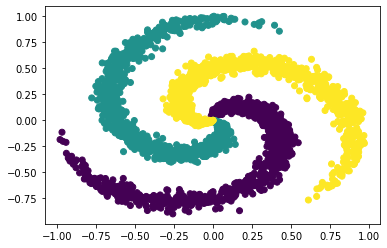

In [16]:
plt.scatter(X.cpu().numpy()[:, 0], X.cpu().numpy()[:, 1], c=y.cpu().numpy())

## Linear model

In [17]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [18]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)

In [19]:
criterion = torch.nn.CrossEntropyLoss()

In [20]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

In [21]:
for t in range(1000):
    
    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float()/len(y)
    
    print("EPOCH {}/{}, LOSS {}, ACC {}".format(t, 1000, loss.item(), acc))
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

EPOCH 0/1000, LOSS 1.1098268032073975, ACC 0.3333333432674408
EPOCH 1/1000, LOSS 1.1091126203536987, ACC 0.3333333432674408
EPOCH 2/1000, LOSS 1.1084015369415283, ACC 0.3333333432674408
EPOCH 3/1000, LOSS 1.1076940298080444, ACC 0.3333333432674408
EPOCH 4/1000, LOSS 1.1069897413253784, ACC 0.3333333432674408
EPOCH 5/1000, LOSS 1.1062895059585571, ACC 0.3333333432674408
EPOCH 6/1000, LOSS 1.1055923700332642, ACC 0.3333333432674408
EPOCH 7/1000, LOSS 1.1048988103866577, ACC 0.3333333432674408
EPOCH 8/1000, LOSS 1.1042085886001587, ACC 0.3333333432674408
EPOCH 9/1000, LOSS 1.1035218238830566, ACC 0.3333333432674408
EPOCH 10/1000, LOSS 1.1028380393981934, ACC 0.3333333432674408
EPOCH 11/1000, LOSS 1.102157711982727, ACC 0.3333333432674408
EPOCH 12/1000, LOSS 1.1014806032180786, ACC 0.3333333432674408
EPOCH 13/1000, LOSS 1.1008068323135376, ACC 0.3336666524410248
EPOCH 14/1000, LOSS 1.1001362800598145, ACC 0.3336666524410248
EPOCH 15/1000, LOSS 1.09946870803833, ACC 0.3336666524410248
EPOCH

EPOCH 193/1000, LOSS 1.0133270025253296, ACC 0.5209999680519104
EPOCH 194/1000, LOSS 1.0129629373550415, ACC 0.5213333368301392
EPOCH 195/1000, LOSS 1.0125998258590698, ACC 0.5213333368301392
EPOCH 196/1000, LOSS 1.012237787246704, ACC 0.5206666588783264
EPOCH 197/1000, LOSS 1.0118765830993652, ACC 0.5226666331291199
EPOCH 198/1000, LOSS 1.0115160942077637, ACC 0.5246666669845581
EPOCH 199/1000, LOSS 1.011156439781189, ACC 0.5239999890327454
EPOCH 200/1000, LOSS 1.0107979774475098, ACC 0.5253333449363708
EPOCH 201/1000, LOSS 1.0104401111602783, ACC 0.5253333449363708
EPOCH 202/1000, LOSS 1.0100831985473633, ACC 0.5256666541099548
EPOCH 203/1000, LOSS 1.0097272396087646, ACC 0.5253333449363708
EPOCH 204/1000, LOSS 1.0093718767166138, ACC 0.5256666541099548
EPOCH 205/1000, LOSS 1.0090177059173584, ACC 0.5246666669845581
EPOCH 206/1000, LOSS 1.0086642503738403, ACC 0.5256666541099548
EPOCH 207/1000, LOSS 1.0083116292953491, ACC 0.5253333449363708
EPOCH 208/1000, LOSS 1.0079599618911743, A

EPOCH 390/1000, LOSS 0.9550071358680725, ACC 0.5133333206176758
EPOCH 391/1000, LOSS 0.9547652006149292, ACC 0.5139999985694885
EPOCH 392/1000, LOSS 0.9545236229896545, ACC 0.5136666893959045
EPOCH 393/1000, LOSS 0.9542824029922485, ACC 0.5136666893959045
EPOCH 394/1000, LOSS 0.9540418386459351, ACC 0.5133333206176758
EPOCH 395/1000, LOSS 0.9538015723228455, ACC 0.5133333206176758
EPOCH 396/1000, LOSS 0.9535617828369141, ACC 0.5133333206176758
EPOCH 397/1000, LOSS 0.9533222913742065, ACC 0.5133333206176758
EPOCH 398/1000, LOSS 0.953083336353302, ACC 0.5133333206176758
EPOCH 399/1000, LOSS 0.9528447985649109, ACC 0.5130000114440918
EPOCH 400/1000, LOSS 0.9526068568229675, ACC 0.512333333492279
EPOCH 401/1000, LOSS 0.9523690342903137, ACC 0.5119999647140503
EPOCH 402/1000, LOSS 0.9521318078041077, ACC 0.5119999647140503
EPOCH 403/1000, LOSS 0.9518951177597046, ACC 0.512333333492279
EPOCH 404/1000, LOSS 0.9516585469245911, ACC 0.512333333492279
EPOCH 405/1000, LOSS 0.9514226913452148, ACC

EPOCH 601/1000, LOSS 0.9121860265731812, ACC 0.5099999904632568
EPOCH 602/1000, LOSS 0.9120168685913086, ACC 0.5099999904632568
EPOCH 603/1000, LOSS 0.9118474721908569, ACC 0.5099999904632568
EPOCH 604/1000, LOSS 0.9116788506507874, ACC 0.5096666812896729
EPOCH 605/1000, LOSS 0.9115102291107178, ACC 0.5096666812896729
EPOCH 606/1000, LOSS 0.9113419651985168, ACC 0.5096666812896729
EPOCH 607/1000, LOSS 0.9111738204956055, ACC 0.5093333125114441
EPOCH 608/1000, LOSS 0.9110062122344971, ACC 0.5096666812896729
EPOCH 609/1000, LOSS 0.9108386039733887, ACC 0.5096666812896729
EPOCH 610/1000, LOSS 0.9106712937355042, ACC 0.5090000033378601
EPOCH 611/1000, LOSS 0.9105042219161987, ACC 0.5086666345596313
EPOCH 612/1000, LOSS 0.9103376269340515, ACC 0.5090000033378601
EPOCH 613/1000, LOSS 0.9101713299751282, ACC 0.5090000033378601
EPOCH 614/1000, LOSS 0.9100050330162048, ACC 0.5090000033378601
EPOCH 615/1000, LOSS 0.9098392128944397, ACC 0.5090000033378601
EPOCH 616/1000, LOSS 0.9096735119819641,

EPOCH 809/1000, LOSS 0.8820497393608093, ACC 0.503333330154419
EPOCH 810/1000, LOSS 0.8819265365600586, ACC 0.503333330154419
EPOCH 811/1000, LOSS 0.881803572177887, ACC 0.503333330154419
EPOCH 812/1000, LOSS 0.8816807270050049, ACC 0.5036666393280029
EPOCH 813/1000, LOSS 0.8815579414367676, ACC 0.5040000081062317
EPOCH 814/1000, LOSS 0.8814354538917542, ACC 0.5040000081062317
EPOCH 815/1000, LOSS 0.8813129663467407, ACC 0.5040000081062317
EPOCH 816/1000, LOSS 0.881190836429596, ACC 0.5040000081062317
EPOCH 817/1000, LOSS 0.8810689449310303, ACC 0.5040000081062317
EPOCH 818/1000, LOSS 0.880946934223175, ACC 0.5040000081062317
EPOCH 819/1000, LOSS 0.8808254599571228, ACC 0.5040000081062317
EPOCH 820/1000, LOSS 0.8807041049003601, ACC 0.5040000081062317
EPOCH 821/1000, LOSS 0.880582869052887, ACC 0.5040000081062317
EPOCH 822/1000, LOSS 0.880461573600769, ACC 0.5040000081062317
EPOCH 823/1000, LOSS 0.8803406357765198, ACC 0.5043333172798157
EPOCH 824/1000, LOSS 0.8802200555801392, ACC 0.5

In [22]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


## Non-linear model

In [23]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)

In [24]:
criterion = torch.nn.CrossEntropyLoss()

In [25]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

In [26]:
for t in range(1000):
    
    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float()/len(y)
    
    print("EPOCH {}/{}, LOSS {}, ACC {}".format(t, 1000, loss.item(), acc))
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    

EPOCH 0/1000, LOSS 1.1230802536010742, ACC 0.1863333284854889
EPOCH 1/1000, LOSS 1.116625428199768, ACC 0.18400000035762787
EPOCH 2/1000, LOSS 1.110263466835022, ACC 0.18533332645893097
EPOCH 3/1000, LOSS 1.1039958000183105, ACC 0.2123333364725113
EPOCH 4/1000, LOSS 1.0978220701217651, ACC 0.2540000081062317
EPOCH 5/1000, LOSS 1.091739535331726, ACC 0.2770000100135803
EPOCH 6/1000, LOSS 1.0857480764389038, ACC 0.3323333263397217
EPOCH 7/1000, LOSS 1.0798448324203491, ACC 0.38099998235702515
EPOCH 8/1000, LOSS 1.074027180671692, ACC 0.414000004529953
EPOCH 9/1000, LOSS 1.0682928562164307, ACC 0.45666664838790894
EPOCH 10/1000, LOSS 1.0626401901245117, ACC 0.48399999737739563
EPOCH 11/1000, LOSS 1.0570672750473022, ACC 0.5049999952316284
EPOCH 12/1000, LOSS 1.0515718460083008, ACC 0.5183333158493042
EPOCH 13/1000, LOSS 1.0461516380310059, ACC 0.5266666412353516
EPOCH 14/1000, LOSS 1.0408051013946533, ACC 0.5270000100135803
EPOCH 15/1000, LOSS 1.0355304479599, ACC 0.5293333530426025
EPOCH

EPOCH 188/1000, LOSS 0.6478885412216187, ACC 0.612666666507721
EPOCH 189/1000, LOSS 0.6468159556388855, ACC 0.6140000224113464
EPOCH 190/1000, LOSS 0.6457453966140747, ACC 0.6153333187103271
EPOCH 191/1000, LOSS 0.6446766257286072, ACC 0.6159999966621399
EPOCH 192/1000, LOSS 0.6436092853546143, ACC 0.6163333058357239
EPOCH 193/1000, LOSS 0.6425433158874512, ACC 0.6176666617393494
EPOCH 194/1000, LOSS 0.6414790749549866, ACC 0.6190000176429749
EPOCH 195/1000, LOSS 0.6404169797897339, ACC 0.6193333268165588
EPOCH 196/1000, LOSS 0.6393573880195618, ACC 0.6200000047683716
EPOCH 197/1000, LOSS 0.638299822807312, ACC 0.621666669845581
EPOCH 198/1000, LOSS 0.6372435092926025, ACC 0.6240000128746033
EPOCH 199/1000, LOSS 0.6361885070800781, ACC 0.6243333220481873
EPOCH 200/1000, LOSS 0.6351343989372253, ACC 0.625
EPOCH 201/1000, LOSS 0.6340810060501099, ACC 0.625
EPOCH 202/1000, LOSS 0.6330286264419556, ACC 0.6256666779518127
EPOCH 203/1000, LOSS 0.6319770812988281, ACC 0.6263333559036255
EPOCH

EPOCH 320/1000, LOSS 0.5132260322570801, ACC 0.7416666746139526
EPOCH 321/1000, LOSS 0.5122609734535217, ACC 0.7419999837875366
EPOCH 322/1000, LOSS 0.5112975239753723, ACC 0.7429999709129333
EPOCH 323/1000, LOSS 0.5103358030319214, ACC 0.7440000176429749
EPOCH 324/1000, LOSS 0.5093757510185242, ACC 0.7450000047683716
EPOCH 325/1000, LOSS 0.5084173679351807, ACC 0.7456666827201843
EPOCH 326/1000, LOSS 0.507460355758667, ACC 0.7459999918937683
EPOCH 327/1000, LOSS 0.5065048336982727, ACC 0.746666669845581
EPOCH 328/1000, LOSS 0.5055508017539978, ACC 0.7473333477973938
EPOCH 329/1000, LOSS 0.5045979022979736, ACC 0.7473333477973938
EPOCH 330/1000, LOSS 0.5036468505859375, ACC 0.7490000128746033
EPOCH 331/1000, LOSS 0.5026971697807312, ACC 0.7493333220481873
EPOCH 332/1000, LOSS 0.5017492771148682, ACC 0.750333309173584
EPOCH 333/1000, LOSS 0.5008028745651245, ACC 0.7506666779518127
EPOCH 334/1000, LOSS 0.49985823035240173, ACC 0.7513332962989807
EPOCH 335/1000, LOSS 0.49891504645347595, 

EPOCH 455/1000, LOSS 0.40024837851524353, ACC 0.8246666789054871
EPOCH 456/1000, LOSS 0.39954325556755066, ACC 0.824999988079071
EPOCH 457/1000, LOSS 0.3988402187824249, ACC 0.825333297252655
EPOCH 458/1000, LOSS 0.39813899993896484, ACC 0.8256666660308838
EPOCH 459/1000, LOSS 0.39743945002555847, ACC 0.8259999752044678
EPOCH 460/1000, LOSS 0.396741658449173, ACC 0.8259999752044678
EPOCH 461/1000, LOSS 0.3960455060005188, ACC 0.8263333439826965
EPOCH 462/1000, LOSS 0.39535096287727356, ACC 0.8263333439826965
EPOCH 463/1000, LOSS 0.3946581482887268, ACC 0.8263333439826965
EPOCH 464/1000, LOSS 0.3939670920372009, ACC 0.8266666531562805
EPOCH 465/1000, LOSS 0.3932778239250183, ACC 0.8269999623298645
EPOCH 466/1000, LOSS 0.39259034395217896, ACC 0.8276666402816772
EPOCH 467/1000, LOSS 0.39190471172332764, ACC 0.828000009059906
EPOCH 468/1000, LOSS 0.3912205398082733, ACC 0.82833331823349
EPOCH 469/1000, LOSS 0.3905380964279175, ACC 0.8286666870117188
EPOCH 470/1000, LOSS 0.3898574113845825

EPOCH 586/1000, LOSS 0.3217855393886566, ACC 0.8633333444595337
EPOCH 587/1000, LOSS 0.3212750554084778, ACC 0.8636666536331177
EPOCH 588/1000, LOSS 0.32076549530029297, ACC 0.8643333315849304
EPOCH 589/1000, LOSS 0.32025694847106934, ACC 0.8646666407585144
EPOCH 590/1000, LOSS 0.3197495639324188, ACC 0.8653333187103271
EPOCH 591/1000, LOSS 0.3192432224750519, ACC 0.8653333187103271
EPOCH 592/1000, LOSS 0.3187381625175476, ACC 0.8653333187103271
EPOCH 593/1000, LOSS 0.318234384059906, ACC 0.8656666278839111
EPOCH 594/1000, LOSS 0.3177320957183838, ACC 0.8656666278839111
EPOCH 595/1000, LOSS 0.3172314167022705, ACC 0.8666666746139526
EPOCH 596/1000, LOSS 0.3167321979999542, ACC 0.8663333058357239
EPOCH 597/1000, LOSS 0.3162345886230469, ACC 0.8666666746139526
EPOCH 598/1000, LOSS 0.3157385587692261, ACC 0.8669999837875366
EPOCH 599/1000, LOSS 0.31524422764778137, ACC 0.8673333525657654
EPOCH 600/1000, LOSS 0.314751535654068, ACC 0.8676666617393494
EPOCH 601/1000, LOSS 0.3142605721950531

EPOCH 718/1000, LOSS 0.2636745870113373, ACC 0.8989999890327454
EPOCH 719/1000, LOSS 0.26329004764556885, ACC 0.8989999890327454
EPOCH 720/1000, LOSS 0.26290610432624817, ACC 0.8989999890327454
EPOCH 721/1000, LOSS 0.2625228762626648, ACC 0.8993332982063293
EPOCH 722/1000, LOSS 0.2621404528617859, ACC 0.8996666669845581
EPOCH 723/1000, LOSS 0.2617586851119995, ACC 0.8999999761581421
EPOCH 724/1000, LOSS 0.2613774538040161, ACC 0.9006666541099548
EPOCH 725/1000, LOSS 0.26099684834480286, ACC 0.9006666541099548
EPOCH 726/1000, LOSS 0.2606169283390045, ACC 0.9009999632835388
EPOCH 727/1000, LOSS 0.2602377235889435, ACC 0.9009999632835388
EPOCH 728/1000, LOSS 0.2598591446876526, ACC 0.9013333320617676
EPOCH 729/1000, LOSS 0.2594813108444214, ACC 0.9013333320617676
EPOCH 730/1000, LOSS 0.2591038942337036, ACC 0.9016666412353516
EPOCH 731/1000, LOSS 0.258727103471756, ACC 0.9026666283607483
EPOCH 732/1000, LOSS 0.2583508789539337, ACC 0.9026666283607483
EPOCH 733/1000, LOSS 0.257975429296493

EPOCH 909/1000, LOSS 0.2011207938194275, ACC 0.9366666674613953
EPOCH 910/1000, LOSS 0.20084592700004578, ACC 0.9366666674613953
EPOCH 911/1000, LOSS 0.20057173073291779, ACC 0.9366666674613953
EPOCH 912/1000, LOSS 0.2002982795238495, ACC 0.9366666674613953
EPOCH 913/1000, LOSS 0.2000255286693573, ACC 0.9366666674613953
EPOCH 914/1000, LOSS 0.19975323975086212, ACC 0.937666654586792
EPOCH 915/1000, LOSS 0.19948160648345947, ACC 0.937666654586792
EPOCH 916/1000, LOSS 0.19921040534973145, ACC 0.937999963760376
EPOCH 917/1000, LOSS 0.1989397555589676, ACC 0.937999963760376
EPOCH 918/1000, LOSS 0.19866959750652313, ACC 0.937999963760376
EPOCH 919/1000, LOSS 0.1983998864889145, ACC 0.937999963760376
EPOCH 920/1000, LOSS 0.19813068211078644, ACC 0.9383333325386047
EPOCH 921/1000, LOSS 0.1978619247674942, ACC 0.9383333325386047
EPOCH 922/1000, LOSS 0.19759367406368256, ACC 0.9383333325386047
EPOCH 923/1000, LOSS 0.19732600450515747, ACC 0.9386666417121887
EPOCH 924/1000, LOSS 0.19705879688262

In [27]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)
